In [ ]:
name ='ati tesakulsiri'
id = 'st123009'

---------------
# Lab 02 Report
---------------
## 0) Objective
- Learning to train and evaluate and compare the PyTorch AlexNet model to the Inception module (googlenet) on the CIFAR-10 dataset.
- Learn how the parameter work.
------------------
## 1) Introduction
The 2012 Imagenet large-scale visual recognition competition was won by Alexnet. The approach was put forth by Alex Krizhevsky and his colleagues in their 2012 research publication, Imagenet Classification with Deep Convolution Neural Network.

They discovered that the training process was nearly six times faster when the relu was used as an activation function. Additionally, they made use of dropout layers, which stopped their model from overfitting. Additionally, the Imagenet dataset is used to train the model. There are almost a thousand classes and nearly 14 million photos in the Imagenet collection.

The GoogLeNet architecture presented in the ImageNet Large-Scale Visual Recognition Challenge 2014(ILSVRC14) solved computer vision tasks such as image classification and object detection
- ### 1.1 RelU
  - The formula tanh is used to represent a neuron's output (f) as a function of its input. These saturating nonlinearities train with gradient descent far more slowly than the non-saturating nonlinearity. We term AI neurons with this nonlinearity as "rectified linear units," following Nair and Hinton (ReLUs). Deep convolutional neural networks that use ReLUs can learn much more quickly than those that use tanh units.  
- ### 1.2 Convolutional layer parameters

  - The number of parameters $k$ in a kernel for a 2D convolution operation is

$$k = k_w k_h i_c,$$

  - where $k_w$ is the width of the kernel, $k_h$ is the width of kernel, and $i_c$ is the number input channels.
If we have $o_c$ kernels producing $o_c$ output channels, the total number of parameters/weights can be calculated as

$$n_p = k o_c = k_w k_h i_c o_c.$$

  - The bias weight in a convolution operation is optional. It's not needed if you apply normalization procedures such as
batch normalization (almost always done in modern networks), but it is important if you're not using batch normalization.
In that case, the number of biases is equal to the number of kernels:

$$n_p = k_w k_h i_c o_c + o_c.$$

They discovered that the training process was nearly six times faster when the relu was used as an activation function. Additionally, they made use of dropout layers, which stopped their model from overfitting. Additionally, the Imagenet dataset is used to train the model. There are almost a thousand classes and nearly 14 million photos in the Imagenet collection.

- ### 1.3 Alexnet
  - The 2012 Imagenet large-scale visual recognition competition was won by Alexnet. The approach was put forth by Alex Krizhevsky and his colleagues in their 2012 research publication, Imagenet Classification with Deep Convolution Neural Network.

- ### 1.4 GoogleNet
  - The GoogLeNet architecture presented in the ImageNet Large-Scale Visual Recognition Challenge 2014(ILSVRC14) solved computer vision tasks such as image classification and object detection
  - GoogleLeNet or Inception network is an important concept for development CNN classifier. Most of CNNs just stacked convolution deeper and deeper to get performance, but very deep networks are prone to overfitting. It also hard to pass gradient updates through the entire network, and make computation expensive. In the other hands, inception network do in wider path to improve performance.


  - ### Inception block

    - The key innovation introduced by GoogLeNet is the concept of the "inception" block. A standard inception block looks like this:


  - ### Auxiliary classifiers

    - To prevent the middle part of the network from “dying out”, the authors introduced two auxiliary classifiers (The purple boxes in the image). They essentially applied softmax to the outputs of two of the inception modules, and computed an auxiliary loss over the same labels. The total loss function is a weighted sum of the auxiliary loss and the real loss. Weight value used in the paper was 0.3 for each auxiliary loss.

$$ \mathcal{L}_{total} = \mathcal{L}_{Real} + 0.3 \mathcal{L}_{aux_1} + 0.3 \mathcal{L}_{aux_2}$$



---------------

## 2) Lab method

parameter and hyper paramenter we use
- for img augmentation
    - we perform `Resize((70, 70))`,
    - `RandomHorizontalFlip()`
    - `RandomCrop(64)` for trainset of data
    - <br>
    - we perform `Resize((70, 70))`,
    - `RandomHorizontalFlip()`
    - `CenterCrop(64)` for testset of data
    <br><br>
- for Alexnet model we change the last output size to match the num output
``` python 
AlexNet(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(11, 11), stride=(4, 4), padding=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 192, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (4): ReLU(inplace=True)
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): Conv2d(192, 384, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (7): ReLU(inplace=True)
    (8): Conv2d(384, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): ReLU(inplace=True)
    (10): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (avgpool): AdaptiveAvgPool2d(output_size=(6, 6))
  (classifier): Sequential(
    (0): Dropout(p=0.5, inplace=False)
    (1): Linear(in_features=9216, out_features=4096, bias=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.5, inplace=False)
    (4): Linear(in_features=4096, out_features=4096, bias=True)
    (5): ReLU(inplace=True)
    (6): Linear(in_features=4096, out_features=10, bias=True)
  )
)
```

- Number of data to train,val,test
  - we train with 40000 image,
  - 10000 val,
  - 10000 test image 
  - with 256 batch sizze

- Hyper parameter 
  - Here is our hyper parameter set in pytorch
``` python
    criterion = torch.nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(alexnet.parameters(),lr = 0.005,momentum=.9)
    alexnet.to(device)
    num_epoch = 80
```

#### 2.1 Setting

## 2.1 Setting

In [1]:
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import torch.nn as nn
from torchvision import datasets, models, transforms
import torchvision
import torch
import alexnet_module_LRN
import pickle
import goognet_m_
import alexnet_module_
from plt_ati import *
from model_training_ import evaluate

In [2]:
!nvidia-smi

Wed Jan 25 18:24:54 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  On   | 00000000:84:00.0 Off |                  N/A |
| 24%   32C    P8    24W / 250W |   1130MiB / 11264MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  NVIDIA GeForce ...  On   | 00000000:85:00.0 Off |                  N/A |
| 32%   

In [3]:
device = torch.device("cuda:2" if torch.cuda.is_available() else "cpu")
print('Using device', device)

Using device cuda:2


In [4]:
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010))])

test_dataset = torchvision.datasets.CIFAR10(root='/root/data_keep', train=False,
                                            download=True, transform=preprocess)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=4,
                                              shuffle=False, num_workers=2)

Files already downloaded and verified


## 2.2 train weight loading/ testing

In [5]:
goog_module = goognet_m_.GoogLeNet()
criterion0 = nn.CrossEntropyLoss()
params_to_update = goog_module.parameters()
optimizer_goog = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
path = '//root/keep_lab/RTML_Labsession/02_gooalex/lab2proj/goo_sequential_lr_0.001_bestsofar.pth'
goog_module.load_state_dict(torch.load(path))

<All keys matched successfully>

In [6]:
alexnet_module = alexnet_module_.AlexNetModule(10)
criterion1 = nn.CrossEntropyLoss()
params_to_update = alexnet_module.parameters()
optimizer_alex_no = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
path = '/root/keep_lab/RTML_Labsession/02_gooalex/lab2proj/alex_sequential_lr_0.001_bestsofarNO.pth'
alexnet_module.load_state_dict(torch.load(path))

<All keys matched successfully>

In [7]:
alexnet_module_lrn = alexnet_module_LRN.AlexNetModule(10)
# CrossEntropyLoss for multinomial classification (because we have 10 classes)
criterion2 = nn.CrossEntropyLoss()
# parameters = weights
params_to_update = alexnet_module_lrn.parameters()
# Use scholastic gradient descent for update weights in model with learning rate 0.001 and momentum 0.9
optimizer_alx_lrn = optim.SGD(params_to_update, lr=0.001, momentum=0.9)
path = '/root/keep_lab/RTML_Labsession/02_gooalex/lab2proj/alex_sequential_lr_0.001_bestsofar_WITHLRN.pth'
alexnet_module_lrn.load_state_dict(torch.load(path))

<All keys matched successfully>

## 3. result plotting
- ### validation set

In [8]:
with open('/root/models/try.atikeep', 'rb') as handle:
    val_acc_log,val_loss_log = pickle.load(handle)


with open('/root/models/lab2alexacc.atikeep', 'rb') as handle:
    val_loss_logal,val_acc_logal = pickle.load(handle)

with open('/root/models/lab2alexacc_lrn.atikeep', 'rb') as handle:
    val_loss_logallrn,val_acc_logallrn = pickle.load(handle)

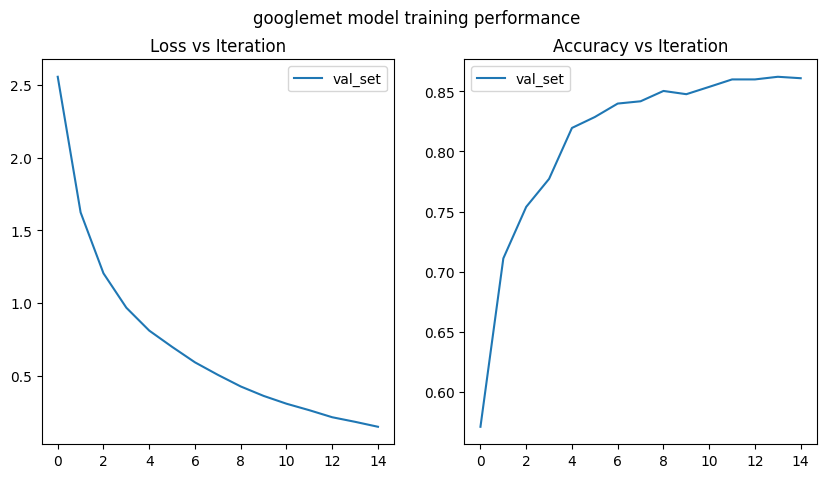

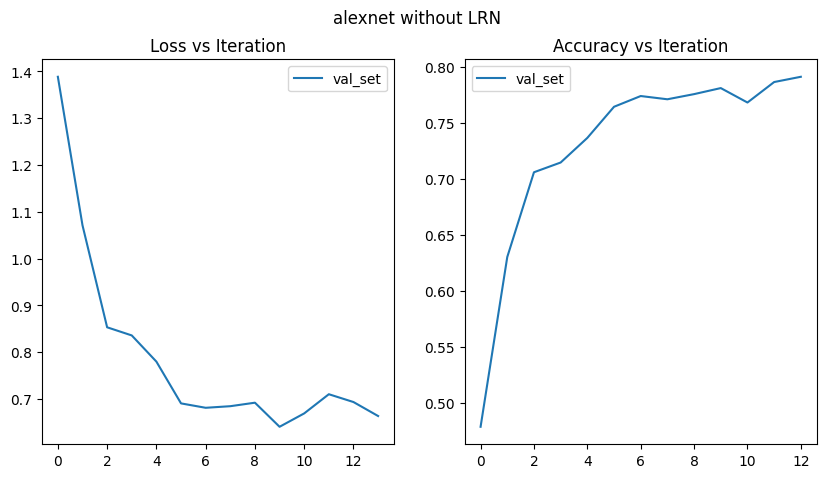

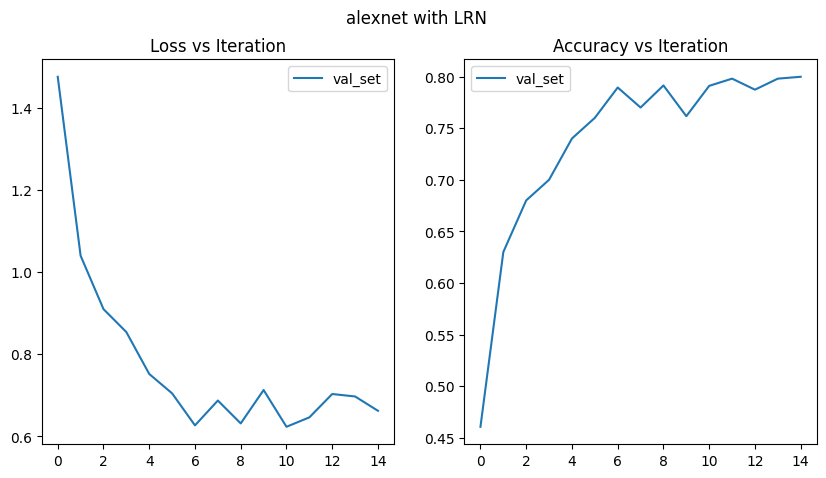

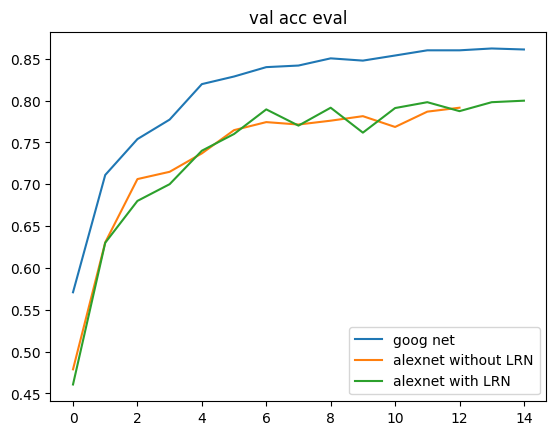

In [9]:
plotaccloss(val_loss_log,val_acc_log,'googlemet model training performance')
plotaccloss(val_loss_logal,val_acc_logal,'alexnet without LRN')
plotaccloss(val_loss_logallrn,val_acc_logallrn,'alexnet with LRN')
plt.title('val acc eval')
plt.plot(torch.Tensor(val_acc_log).cpu(),label = 'goog net')
plt.plot(val_acc_logal,label = 'alexnet without LRN')
plt.plot(val_acc_logallrn,label = 'alexnet with LRN')
plt.legend()
plt.show()

- ### test set

In [14]:

test_loss, test_acc, test_pred_label, test_true_label  = evaluate(goog_module.to(device), test_dataloader, criterion0, device)
goog_tup = [test_loss, test_acc, test_pred_label, test_true_label] 

test_loss, test_acc, test_pred_label, test_true_label  = evaluate(alexnet_module.to(device), test_dataloader, criterion1, device)
alex_tup = [test_loss, test_acc, test_pred_label, test_true_label] 

test_loss, test_acc, test_pred_label, test_true_label  = evaluate(alexnet_module_lrn.to(device), test_dataloader, criterion2, device)
alexlrn_tup = [test_loss, test_acc, test_pred_label, test_true_label] 


In [39]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'googlenet', pretrained=True)
model.eval()
model.fc = nn.Linear(1024, 10)

criterion3 = nn.CrossEntropyLoss()
test_loss, test_acc, test_pred_label, test_true_label  = evaluate(model.to(device), test_dataloader, criterion3, device)
pretraingoog_tup = [test_loss, test_acc, test_pred_label, test_true_label] 
# model

Using cache found in /root/.cache/torch/hub/pytorch_vision_v0.10.0


In [40]:
data = {'goog_Net':goog_tup[1],'alex_withoutLRN':alex_tup[1],'Alexnet_with LRN':alexlrn_tup[1],'googl_pretrained':pretraingoog_tup[1]}
#data = {'goog_Net':goog_tup[1],'alex_withoutLRN':alex_tup[1],'Alexnet_with LRN':alexlrn_tup[1]}

Text(0.5, 1.0, 'accuracy on testing performance')

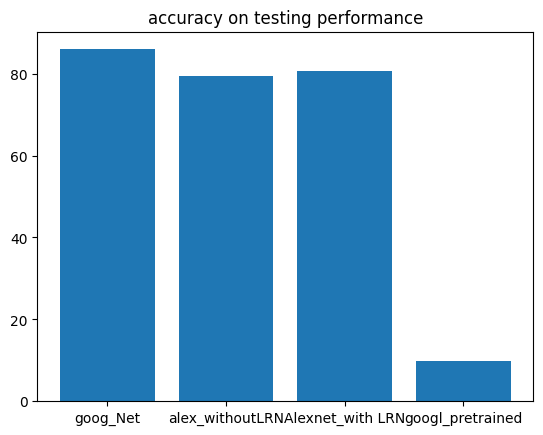

In [41]:
plt.bar(data.keys(),data.values())
plt.title('accuracy on testing performance')

## 4 Conclusion

- As we observe in the bar chart above, we can observe that our train/ build from stratch/pytorch is the best performance compare to the alexnet and alexnet with Local response normalization and also better that google net with pretrained weight.
- Since the pretrain model are train for 1000 output features, directly cut them out will not help the result of the accuracy.
- Training time 
    - with Alexnet :  Training complete in 35m 44s
    - alexNet+ LRN : Training complete in 36m 49s
    - GoogleNet : Training complete in 173m 8s
- To observe the VScode project please visit https://github.com/AtiChetsurakul/RTML_Labsession/tree/main/02_gooalex/lab2proj